## K - Nearest Neighbors storczyki##

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

**Wprowadzenie danych (identyfikacja klas)**

In [4]:
storczyki=pd.read_csv('iris_dane.csv') # dane iris zewnętrzne

In [5]:
storczyki.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
features=storczyki.iloc[:,0:4]   # zmiana liczby features do modelu
target=storczyki.iloc[:,4]

In [7]:
X,X_test,y,y_test=train_test_split(features,target,test_size=0.3,random_state=41)
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


** K - Nearest Neighbor** 

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
pred = knn.predict(X_test)

In [21]:
print(pred)
oryg=np.array(y_test)
print(oryg)

[2 2 2 1 2 1 2 1 2 2 2 0 0 1 0 2 0 2 0 0 1 2 0 0 1 1 1 1 0 1 1 1 1 1 2 0 2
 1 2 2 1 1 0 2 2]
[2 2 2 1 2 1 2 1 2 2 2 0 0 1 0 2 0 1 0 0 1 2 0 0 1 1 1 1 0 1 1 1 2 1 2 0 2
 1 2 1 1 1 0 2 2]


**Ewaluacja**

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 16  2]
 [ 0  1 15]]


In [24]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.94      0.89      0.91        18
          2       0.88      0.94      0.91        16

avg / total       0.93      0.93      0.93        45



**Wyznaczenie wartości K**

In [16]:
error_rate = []


for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

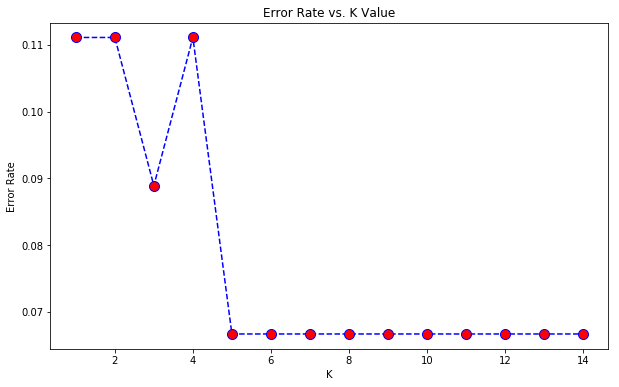

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');